 
 
 <h4><font color='#C44B4B'><center><u>BUSINESS PROBLEM:</u></font><center><br><br>
<font color='#15657F'>PREDICT ASSESSED PROPERTY VALUE  FOR THE PURPOSE OF PROPERTY TAX ASSESSMENT
</font></center></h4>
 
- Property taxes are assessed based on the market value of a property. There are several ways to assess market value, but it is typically done by comparing the subject property with other similar properties that have recently sold or are currently for sale in the same area. If there is no recent comparable data then an appraiser will estimate the market value of the property based on its size, location and quality.

- The appraisal process has historically been subjective and somewhat arbitrary. However, modern technology makes it possible to automate much of this process via machine learning algorithms that take into account many variables including nearby sale prices, lot size, zoning restrictions etc.

**Main task :** 
- Create an analytical and modelling framework to predict the property evaluation value based on the quantitative and qualitative features provided in the dataset.  
- Derive new features from the existing features and also from the domain knowledge, which may help in improving the model efficiency.

**Visualization Tasks:**
- Exploratory Data Analysis using visualizations Jupyter notebook 
format . 

**(Train.xlsx  should be used for this task)**

<h4><font color='#C44B4B'><u></u></font><center><br><br><font color='#15657F'>USE MACHINE LEARNING MODELS TO PREDICT PREDICT ASSESSED PROPERTY VALUE</font></center></h4>

</br>

** Accuracy Metric: **  
> Consider the ‘mape’ as the error metric for regression task to tune the model.


### 1. Feature Description: 


1. **PropertyID**:( Unique ID) - A property ID is an identifier that assists in the identification of commercial properties from one or more jurisdictions. Property IDs are used by real-estate developers, investors, banks and other lenders, as well as by Government agencies such as the RTA (Roads and Traffic Authority).
2. **Borough**:(Numerical) - Borough is an urban area which has its own town council and it can be made up of many different areas such as villages and towns.Borough refers to one of five regions in New York City.
3. **State**:(Categorical) - Which state or territory do you reside in if you live in the United States?
4. **Surroundings**:(Categorical) - What kind of environment does it have?Availability and convenience from other services, such as transport, shops, schools etc.
5. **Address**:(Categorical) - An address is a location used by a business such as an office, a factory, or even a residence.
6. **ZipCode**:(Numerical) - The Zipcode of a property is the unique 9 digit numerical code that is assigned to an address in an American ZIP Code. The U.S. Postal Service assigns a different codes depending on the location, or "zone", of where an address is located. For example, the Zipcodes for Central London are W1A 1AA and SW1A 3AA which have different numbers because they're in different zones, while downtown Detroit's Zipcode is 48238.
7. **Block** & **Lot**:(Numerical) - Block and Lot is a term that is used in the United States to specify the exact location of any type of building, such as a house or store. It is typically used when registering the deed for a property, or when describing the exact positioning and location details of a particular building.
8. **BldgClassCategory**:(Categorical) - A building class category is a property or class that can be found in the New York City zoning code. Building categories are only applicable when a building construction project requires special zoning resolution or certain zoning conditions.

9. **NoOfResidentialUnits**:(Numerical) - It is a variable that counts the number of residential units in a given area. 

10. **NoOfCommercialUnits**:(Numerical) - Commercial Units in New York (NoOfCommercialUnits) is a variable that counts the number of commericial units in a given area.

11. **TotalNoOfUnits**:(Numerical)- Total number of residential and commericial units combined.

12. **LandAreaInSqFt**:(Numerical) - LandAreaInSqFt represents an area in square feet

13. **GrossAreaInSqFt**:(Numerical) - GrossAreaInSqFt represents an area in square feet plus the size of the land's buildings and structures.
 
14. **YearOfConstruction**:(Year) - Year in which Property was constructed.

15. **TaxClass_AtEvaluationTime:** (Categorical) - The tax-class at evaluation-time is the value of an asset for property tax purposes. This value is multiplied by the current property tax rate to give the base amount on which the local property taxes are calculated.

16. **BldgClass_AtEvaluationTime:**(Categorical) - Types of buildings which include residential, commercial, industrial or mixed use.

17. **DateOfEvaluation:**(Date-Time) - Date on which Property was evaluated

18. **PropertyEvaluationvalue**:(Target) - It is the value assigned to a property by the appraiser.



### 2. Importing Libraries & Loading Dataset:

In [1]:
# 'Numpy' is a library for high-performance mathematical calculations which implements various linear algebra concepts including matrix manipulation, numerical solvers and linear systems theory. 
import numpy as np 

# 'Pandas' is a python library used for data manipulation, analysis, and visualization in the form of numbered tables.
import pandas as pd

# 'Seaborn' is used for making statistical data visualization in the style of descriptive statistical graphics. 
import seaborn as sns 

# 'Matplotlib' is used for plotting of 2D or 3D data along with many other types of plots,built on numpy
import matplotlib.pyplot as plt

# 'Import warnings' are a way of telling Python users when they are trying to use modules which have been deprecated and removed.
import warnings

# 'matplotlib inline' is a statement that tells Python to embed matplotlib figures in the code.
%matplotlib inline


from pandas_profiling import ProfileReport

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
#!pip install openpyxl==3.0.0
#!pip install pandas_profiling
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [3]:
# Importing datasets for the purpose of training and testing models.
train=pd.read_excel("/content/drive/MyDrive/PHD-Practice/Train.xlsx")
test=pd.read_excel("/content/drive/MyDrive/PHD-Practice/Test.xlsx")

### 3. Shape of Datasets:

In [4]:
## checking the number of rows and columns in the training data set
print('Shape of Train Data:',train.shape)
print('Shape of Test Data:',test.shape)

Shape of Train Data: (16810, 19)
Shape of Test Data: (2936, 18)


In [5]:
# first five records from the training data set are displayed.
train.head()

PropertyID  Borough State Surroundings                 Address  ZipCode  \
0    PR11101        1    NY     BATHGATE      1473 CROTONA PLACE    10456   
1    PR11102        1    NY     BATHGATE            453 EAST 181    10457   
2    PR11103        1    NY     BATHGATE     511 EAST 171 STREET    10457   
3    PR11104        1    NY     BATHGATE   547 CLAREMONT PARKWAY    10457   
4    PR11105        1    NY     BATHGATE  2063 WASHINGTON AVENUE    10457   

   Block  Lot          BldgClassCategory  NoOfResidentialUnits  \
0   2927  127    02 TWO FAMILY DWELLINGS                     2   
1   3037  110  03 THREE FAMILY DWELLINGS                     3   
2   2912  155    02 TWO FAMILY DWELLINGS                     2   
3   2929  134    02 TWO FAMILY DWELLINGS                     2   
4   3036  140    02 TWO FAMILY DWELLINGS                     2   

   NoOfCommercialUnits  TotalNoOfUnits  LandAreaInSqFt  GrossAreaInSqFt  \
0                    0               2            1900             2394   
1                    0               3            1687             3037   
2                    0               2            2000             2400   
3                    0               2            2356             2394   
4                    0               2            3346             2308   

   YearOfConstruction  TaxClass_AtEvaluationTime BldgClass_AtEvaluationTime  \
0                1990                          1                         B1   
1                2002                          1                         C0   
2                1989                          1                         B1   
3                1991                          1                         B1   
4                1993                          1                         B1   

  DateOfEvaluation  PropertyEvaluationvalue  
0       2014-05-30                   540000  
1       2014-09-13                   750000  
2       2014-09-28                   470000  
3       2014-06-05                   570000  
4       2015-02-07                   640000

In [6]:
# first five records from the test data set are displayed.
test.head()

PropertyID  Borough State  Surroundings              Address  ZipCode  \
0    PR51101        1    NY      BATHGATE        3860 3 AVENUE    10457   
1    PR51102        1    NY      BATHGATE  455 E. 179TH STREET    10457   
2    PR51103        1    NY      BATHGATE        4415 3 AVENUE    10457   
3    PR51104        1    NY      BATHGATE  407 EAST 174 STREET    10457   
4    PR51105        1    NY  EAST TREMONT  2175 CROTONA AVENUE    10457   

   Block  Lot          BldgClassCategory  NoOfResidentialUnits  \
0   2929  117       02  TWO FAMILY HOMES                     2   
1   3036   65    02 TWO FAMILY DWELLINGS                     2   
2   3048   51     14 RENTALS - 4-10 UNIT                     4   
3   2899   34              30 WAREHOUSES                     0   
4   3083   40  03 THREE FAMILY DWELLINGS                     3   

   NoOfCommercialUnits  TotalNoOfUnits  LandAreaInSqFt  GrossAreaInSqFt  \
0                    0               2            2498             2394   
1                    0               2            2033             2340   
2                    1               5            2500             6000   
3                    1               1            3439             3320   
4                    0               3            1348             2931   

   YearOfConstruction  TaxClass_AtEvaluationTime BldgClass_AtEvaluationTime  \
0                1995                          1                         B1   
1                1994                          1                         B1   
2                1963                          2                         S4   
3                1951                          4                         E1   
4                1997                          1                         C0   

  DateOfEvaluation  
0       2013-06-24  
1       2014-08-28  
2       2015-01-31  
3       2015-03-12  
4       2014-06-07

### 4. Dataset Information:

In [7]:
# 'columns' function returns a list of all the columns in the dataset.
train.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [8]:
# 'info' function gives the data type and null values for each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  16810 non-null  object        
 1   Borough                     16810 non-null  int64         
 2   State                       16810 non-null  object        
 3   Surroundings                16810 non-null  object        
 4   Address                     16810 non-null  object        
 5   ZipCode                     16810 non-null  int64         
 6   Block                       16810 non-null  int64         
 7   Lot                         16810 non-null  int64         
 8   BldgClassCategory           16810 non-null  object        
 9   NoOfResidentialUnits        16810 non-null  int64         
 10  NoOfCommercialUnits         16810 non-null  int64         
 11  TotalNoOfUnits              16810 non-null  int64     

In [9]:
# the describe() returns the statistical summary of the numeric variables
train.describe()

Borough       ZipCode         Block           Lot  \
count  16810.000000  16810.000000  16810.000000  16810.000000   
mean       3.439143  10871.027543   5428.122308    266.327722   
std        1.398950    522.996869   3710.031921    542.420132   
min        1.000000  10001.000000      6.000000      1.000000   
25%        2.000000  10312.000000   2401.250000     25.000000   
50%        3.000000  11207.000000   5050.000000     52.000000   
75%        5.000000  11364.000000   7376.750000    138.000000   
max        5.000000  11694.000000  16314.000000   5323.000000   

       NoOfResidentialUnits  NoOfCommercialUnits  TotalNoOfUnits  \
count          16810.000000         16810.000000    16810.000000   
mean               1.862225             0.137775        2.000000   
std                8.027805             2.185857        8.472771   
min                0.000000             0.000000        1.000000   
25%                1.000000             0.000000        1.000000   
50%                1.000000             0.000000        1.000000   
75%                2.000000             0.000000        2.000000   
max              437.000000           252.000000      437.000000   

       LandAreaInSqFt  GrossAreaInSqFt  YearOfConstruction  \
count    1.681000e+04     1.681000e+04        16810.000000   
mean     1.092492e+04     3.612157e+03         1973.982867   
std      5.837620e+04     1.627378e+04           23.632595   
min      1.000000e+00     1.000000e+00         1941.000000   
25%      2.100000e+03     1.224000e+03         1951.000000   
50%      3.200000e+03     1.750000e+03         1968.000000   
75%      5.000000e+03     2.449750e+03         1998.000000   
max      5.612000e+06     1.172005e+06         2012.000000   

       TaxClass_AtEvaluationTime  PropertyEvaluationvalue  
count               16810.000000             1.681000e+04  
mean                    1.289530             8.084101e+05  
std                     0.713779             8.978317e+05  
min                     1.000000             1.000440e+05  
25%                     1.000000             4.250000e+05  
50%                     1.000000             5.900000e+05  
75%                     1.000000             8.450000e+05  
max                     4.000000             9.935000e+06

In [10]:
#it gives the statistical summary of all the categorical variables
train.describe(include=object)

PropertyID  State    Surroundings               Address  \
count       16810  16810           16810                 16810   
unique      16810      1             243                 15219   
top       PR11101     NY  FLUSHING-NORTH  102 WEST 57TH STREET   
freq            1  16810             801                   102   

              BldgClassCategory BldgClass_AtEvaluationTime  
count                     16810                      16810  
unique                       52                        101  
top     01 ONE FAMILY DWELLINGS                         A5  
freq                       4272                       3454

#### Observation

1. We can see that we dont have any duplicate entry for Property ID.

2. 'State' Column has only one unique value ,so we can drop this variable.

3.  'Surroundings','Address' have categories more than 200,thus we can drop this variable as well.

4. 'DateOfEvaluation' and 'Yearof Construction' provides same information on the age of property,we can use these columns to create new features. This can be done by extracting year from Date of Evaluation.

5. 'BldgClassCategory'  is a subset of  'BldgClass_AtEvaluationTime',thus we can create a unique dictionary and map with all the values for BldgClass_AtEvaluationTime and create additional features.

6. 'ZipCode' can be used in conjuction with targetvalue ie PropertyEvaluationvalue and we can extract information based on each zipcode.

7. 'TotalNoOfUnits' is the total of 'Residential Units' and 'Commercial Units'.Thus we can drop both residential and commercial units as it provides similar information.


In [11]:
# extract Year
train['year_evaluation'] = [i.year for i in train['DateOfEvaluation']]
test['year_evaluation'] = [i.year for i in test['DateOfEvaluation']]


In [12]:
train = train.drop(columns=['DateOfEvaluation'])
test = test.drop(columns=['DateOfEvaluation'])

### 5. Missing values:

In [13]:
# Check Missing Values by passing a list comphresion and is.null method
mis_val = [var for var in train.columns if train[var].isnull().sum()>0]
train[mis_val].isnull().sum()

Series([], dtype: float64)

In [14]:
# Check Missing values with length method
print("Total no of variables with missing value in the dataset: ", len(mis_val))

Total no of variables with missing value in the dataset:  0


### 6. Numerical variables:

In [15]:
# Check Numerical variables and print the result
num_vars = [var for var in train.columns if train[var].dtypes!= 'O']
print("Total no of numerical variables in the train dataset: ", len(num_vars))

Total no of numerical variables in the train dataset:  13


In [16]:
train[num_vars].head()

Borough  ZipCode  Block  Lot  NoOfResidentialUnits  NoOfCommercialUnits  \
0        1    10456   2927  127                     2                    0   
1        1    10457   3037  110                     3                    0   
2        1    10457   2912  155                     2                    0   
3        1    10457   2929  134                     2                    0   
4        1    10457   3036  140                     2                    0   

   TotalNoOfUnits  LandAreaInSqFt  GrossAreaInSqFt  YearOfConstruction  \
0               2            1900             2394                1990   
1               3            1687             3037                2002   
2               2            2000             2400                1989   
3               2            2356             2394                1991   
4               2            3346             2308                1993   

   TaxClass_AtEvaluationTime  PropertyEvaluationvalue  year_evaluation  
0                          1                   540000             2014  
1                          1                   750000             2014  
2                          1                   470000             2014  
3                          1                   570000             2014  
4                          1                   640000             2015

In [17]:
# Checking Categorical variable and printing the output
cat_vars=[var for var in train.columns if train[var].dtypes =='O']
print("Total no of categorical variables in the train dataset: ", len(cat_vars))

Total no of categorical variables in the train dataset:  6


In [18]:
for var in cat_vars:
    print(var, len(train[var].unique()), " Categories")

PropertyID 16810  Categories
State 1  Categories
Surroundings 243  Categories
Address 15219  Categories
BldgClassCategory 52  Categories
BldgClass_AtEvaluationTime 101  Categories


In [19]:
def analyze_rare_labels(df, var, rare_perc):
    new_df = df.copy()
    # determine the % of observations per category
    tmp = new_df.groupby(var)['PropertyEvaluationvalue'].count() / len(new_df)
    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than 1 % of the observations
for var in cat_vars:
    print(analyze_rare_labels(train, var, 0.01))
    print()

PropertyID
PR11101    0.000059
PR11102    0.000059
PR11103    0.000059
PR11104    0.000059
PR11105    0.000059
             ...   
PR27906    0.000059
PR27907    0.000059
PR27908    0.000059
PR27909    0.000059
PR27910    0.000059
Name: PropertyEvaluationvalue, Length: 16810, dtype: float64

Series([], Name: PropertyEvaluationvalue, dtype: float64)

Surroundings
AIRPORT LA GUARDIA      0.000238
ALPHABET CITY           0.000119
ANNADALE                0.008090
ARROCHAR                0.000892
ARROCHAR-SHORE ACRES    0.000416
                          ...   
WOODHAVEN               0.001011
WOODLAWN                0.000654
WOODROW                 0.008328
WOODSIDE                0.003212
WYCKOFF HEIGHTS         0.000238
Name: PropertyEvaluationvalue, Length: 223, dtype: float64

Address
1 BAY CLUB DRIVE              0.000595
1 BAY CLUB DRIVE, 18W         0.000059
1 BAY CLUB DRIVE, 3D          0.000059
1 BAY CLUB DRIVE, 7D          0.000059
1 BAY CLUB DRIVE, 7W          0.000059
         

In [20]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(1, ['year_evaluation'])

In [21]:
# Checking discrete variables which has value less then 20
discrete_vars = [var for var in num_vars if len(train[var].unique())<20]
print('No of discrete variables : ', len(train))

No of discrete variables :  16810


In [22]:
train[discrete_vars].head()

Borough  NoOfCommercialUnits  TaxClass_AtEvaluationTime  year_evaluation
0        1                    0                          1             2014
1        1                    0                          1             2014
2        1                    0                          1             2014
3        1                    0                          1             2014
4        1                    0                          1             2015

In [23]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  9


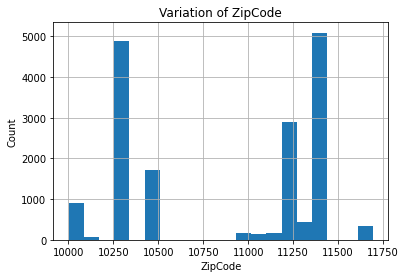

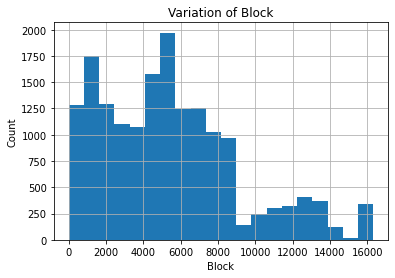

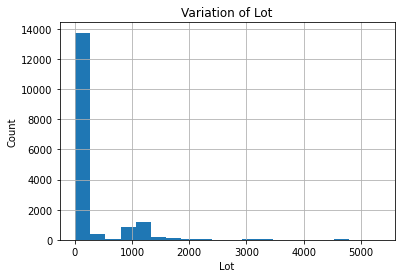

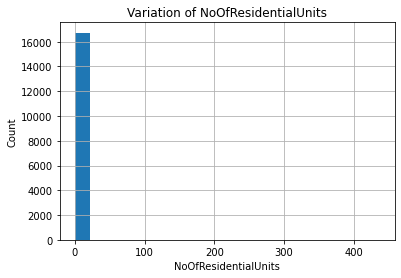

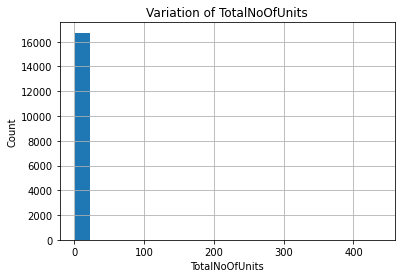

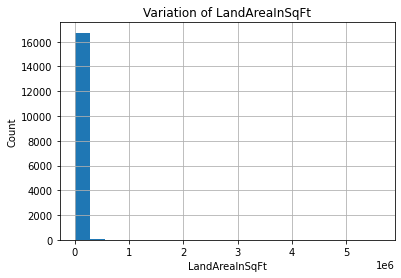

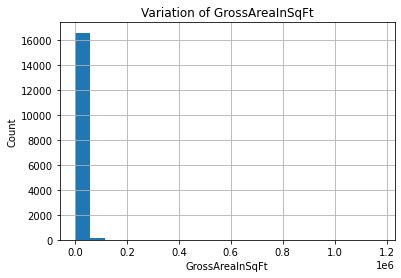

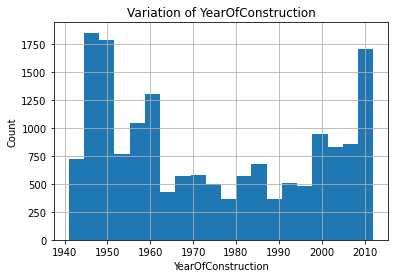

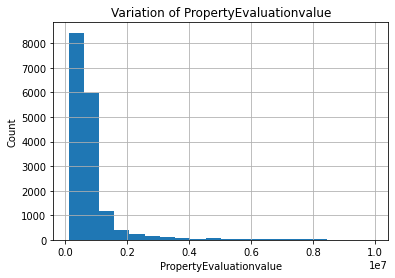

In [24]:
def analyze_cont_vars(df,var):
    
    new_df = train.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(train,var)

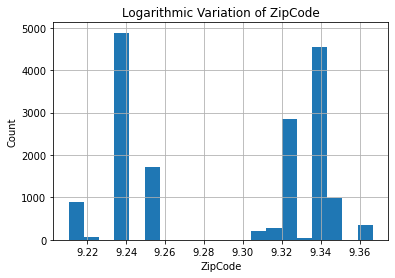

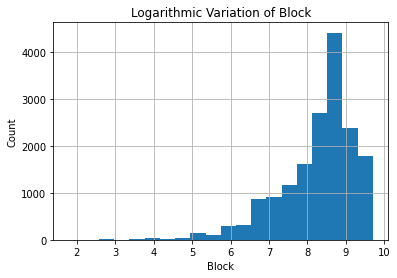

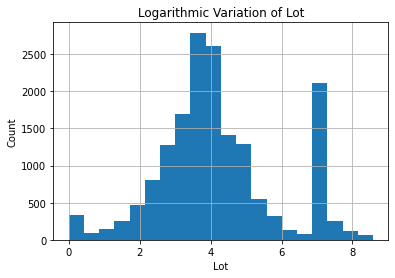

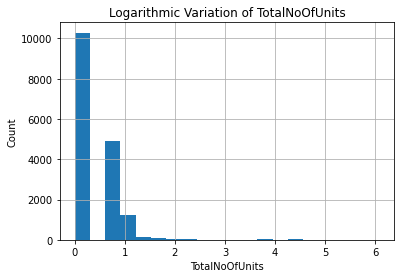

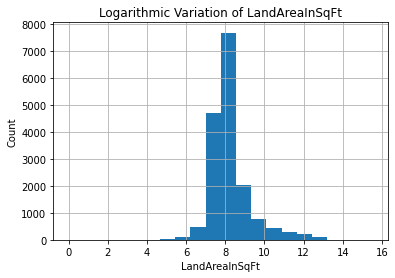

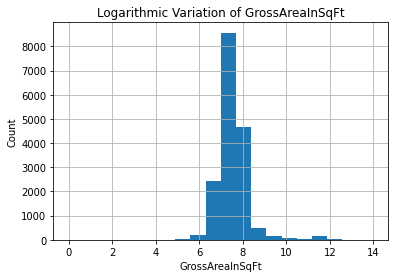

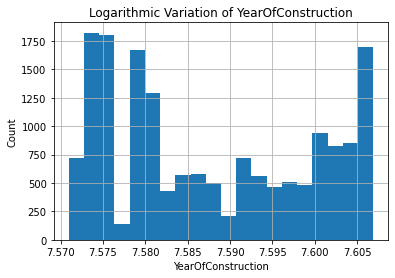

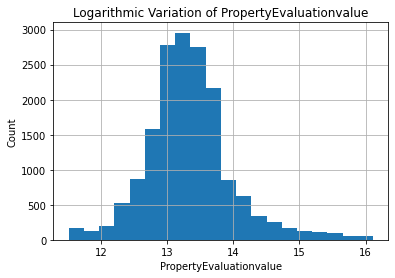

In [25]:
def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
        #log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(train,var)

### 7. Analyzing Outliers:

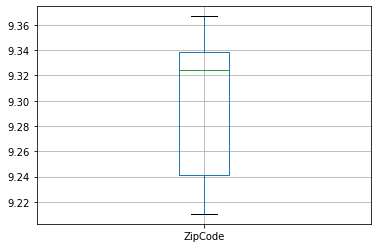

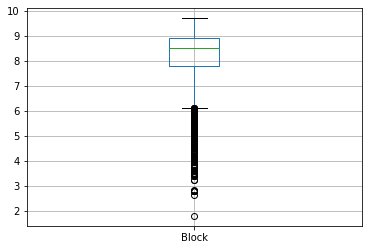

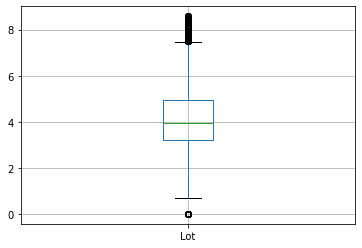

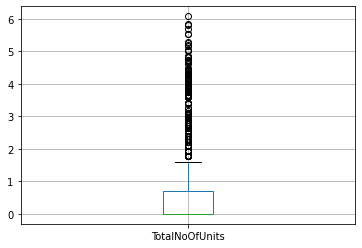

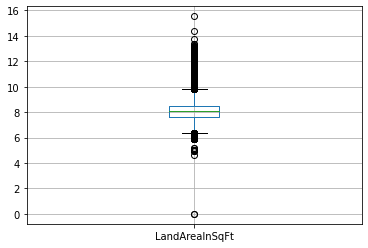

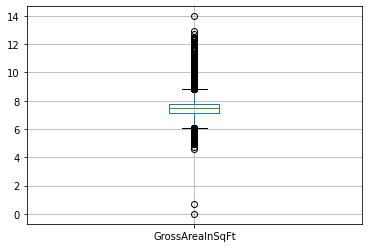

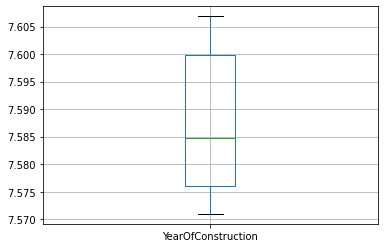

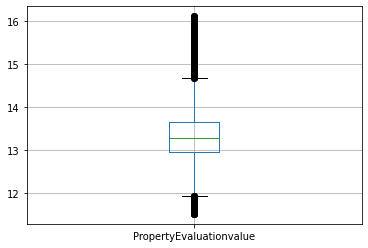

In [26]:
def analyze_outliers(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.show()
        
for var in cont_vars:
    analyze_outliers(train,var)



1. 'Block', 'Lot', 'TotalNoofUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt' and 'PropertyEvaluationvalue' have outliers which can be displayed from above graphs.

In [27]:
#train.to_csv('/content/drive/MyDrive/PHD-Practice/mith_train_initial_dataset.csv', index=False)

In [28]:
#test.to_csv('/content/drive/MyDrive/PHD-Practice/mith_test_initial_dataset.csv', index=False)

### Auto EDA

In [31]:
# Restart kernel before running this cell
profile = ProfileReport(train,title="Pandas Profiling Report" ,explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]